## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Load The Dataset

In [2]:
# file_path = r'C:\Users\Dell\Downloads\Global_superstore1.csv'
df = pd.read_csv('Global_superstore1.csv', encoding='latin1')
df = df.drop(columns=['City','Discount','Shipping Cost','State'])
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Profit
0,31-07-2012,31-07-2012,Same Day,Rick Hansen,Consumer,United States,East,Technology,Accessories,2309.650,7,762.1845
1,05-02-2013,07-02-2013,Second Class,Justin Ritter,Corporate,Australia,Oceania,Furniture,Chairs,3709.395,9,-288.7650
2,17-10-2013,18-10-2013,First Class,Craig Reiter,Consumer,Australia,Oceania,Technology,Phones,5175.171,9,919.9710
3,28-01-2013,30-01-2013,First Class,Katherine Murray,Home Office,Germany,Central,Technology,Phones,2892.510,5,-96.5400
4,05-11-2013,06-11-2013,Same Day,Rick Hansen,Consumer,Senegal,Africa,Technology,Copiers,2832.960,8,311.5200
...,...,...,...,...,...,...,...,...,...,...,...,...
51285,19-06-2014,19-06-2014,Same Day,Katrina Edelman,Corporate,Japan,North Asia,Office Supplies,Fasteners,65.100,5,4.5000
51286,20-06-2014,24-06-2014,Standard Class,Zuschuss Carroll,Consumer,United States,Central,Office Supplies,Appliances,0.444,1,-1.1100
51287,02-12-2013,02-12-2013,Same Day,Laurel Beltran,Home Office,United States,West,Office Supplies,Envelopes,22.920,3,11.2308
51288,18-02-2012,22-02-2012,Standard Class,Ross Baird,Home Office,Brazil,South,Office Supplies,Binders,13.440,2,2.4000


In [3]:
df.describe()

,Sales,Quantity,Profit
count,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,28.610982
std,487.565361,2.278766,174.340972
min,0.444000,1.000000,-6599.978000
25%,30.758625,2.000000,0.000000
50%,85.053000,3.000000,9.240000
75%,251.053200,5.000000,36.810000
max,22638.480000,14.000000,8399.976000


## Count Null Values

In [4]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
Region           0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Profit           0
dtype: int64

## Check Data Type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     51290 non-null  object 
 1   Ship Date      51290 non-null  object 
 2   Ship Mode      51290 non-null  object 
 3   Customer Name  51290 non-null  object 
 4   Segment        51290 non-null  object 
 5   Country        51290 non-null  object 
 6   Region         51290 non-null  object 
 7   Category       51290 non-null  object 
 8   Sub-Category   51290 non-null  object 
 9   Sales          51290 non-null  float64
 10  Quantity       51290 non-null  int64  
 11  Profit         51290 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 4.7+ MB


## Clean The Data

In [6]:
df['Profit'] = abs(df['Profit'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     51290 non-null  datetime64[ns]
 1   Ship Date      51290 non-null  datetime64[ns]
 2   Ship Mode      51290 non-null  object        
 3   Customer Name  51290 non-null  object        
 4   Segment        51290 non-null  object        
 5   Country        51290 non-null  object        
 6   Region         51290 non-null  object        
 7   Category       51290 non-null  object        
 8   Sub-Category   51290 non-null  object        
 9   Sales          51290 non-null  float64       
 10  Quantity       51290 non-null  int64         
 11  Profit         51290 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 4.7+ MB


## Checking Outliers

In [8]:
q1,q3 = np.percentile(df['Sales'],[25,75])
q1,q3

(30.758625000000002, 251.0532)

## Interquartile Range

In [9]:
iqr = q3-q1
iqr

220.294575

## Lower Extreme And Upper Extreme

In [10]:
lx = q1-1.5*iqr
ux = q3+1.5*iqr
ux

581.4950625

In [11]:
df = df.loc[df['Sales']<ux]

In [12]:
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Profit
685,2013-09-24,2013-09-24,Same Day,Hilary Holden,Corporate,Tanzania,Africa,Office Supplies,Appliances,553.440,8,16.5600
815,2011-11-23,2011-11-25,First Class,Becky Martin,Consumer,Indonesia,Southeast Asia,Technology,Machines,473.847,5,5.8530
844,2011-11-28,2011-11-30,First Class,Sung Chung,Consumer,Mexico,North,Technology,Machines,533.220,3,69.3000
865,2014-02-09,2014-04-09,First Class,Alejandro Grove,Consumer,Czech Republic,EMEA,Furniture,Chairs,457.140,1,169.1400
942,2014-09-17,2014-09-19,First Class,Adam Shillingsburg,Consumer,United States,East,Office Supplies,Binders,538.194,2,412.6154
...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,Same Day,Katrina Edelman,Corporate,Japan,North Asia,Office Supplies,Fasteners,65.100,5,4.5000
51286,2014-06-20,2014-06-24,Standard Class,Zuschuss Carroll,Consumer,United States,Central,Office Supplies,Appliances,0.444,1,1.1100
51287,2013-02-12,2013-02-12,Same Day,Laurel Beltran,Home Office,United States,West,Office Supplies,Envelopes,22.920,3,11.2308
51288,2012-02-18,2012-02-22,Standard Class,Ross Baird,Home Office,Brazil,South,Office Supplies,Binders,13.440,2,2.4000


In [13]:
df['year']=df['Order Date'].dt.year
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Profit,year
685,2013-09-24,2013-09-24,Same Day,Hilary Holden,Corporate,Tanzania,Africa,Office Supplies,Appliances,553.440,8,16.5600,2013
815,2011-11-23,2011-11-25,First Class,Becky Martin,Consumer,Indonesia,Southeast Asia,Technology,Machines,473.847,5,5.8530,2011
844,2011-11-28,2011-11-30,First Class,Sung Chung,Consumer,Mexico,North,Technology,Machines,533.220,3,69.3000,2011
865,2014-02-09,2014-04-09,First Class,Alejandro Grove,Consumer,Czech Republic,EMEA,Furniture,Chairs,457.140,1,169.1400,2014
942,2014-09-17,2014-09-19,First Class,Adam Shillingsburg,Consumer,United States,East,Office Supplies,Binders,538.194,2,412.6154,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,Same Day,Katrina Edelman,Corporate,Japan,North Asia,Office Supplies,Fasteners,65.100,5,4.5000,2014
51286,2014-06-20,2014-06-24,Standard Class,Zuschuss Carroll,Consumer,United States,Central,Office Supplies,Appliances,0.444,1,1.1100,2014
51287,2013-02-12,2013-02-12,Same Day,Laurel Beltran,Home Office,United States,West,Office Supplies,Envelopes,22.920,3,11.2308,2013
51288,2012-02-18,2012-02-22,Standard Class,Ross Baird,Home Office,Brazil,South,Office Supplies,Binders,13.440,2,2.4000,2012


# Total Sales

In [14]:
df['Sales'].sum()

5551947.653280001

## Ship Mode Count

In [15]:
sdf = df['Ship Mode'].value_counts()
sdf = sdf.reset_index().rename(columns={'index':'Ship Mode','Ship Mode':'count'})
sdf

,Ship Mode,count
0,Standard Class,27400
1,Second Class,9161
2,First Class,6682
3,Same Day,2392


## Segmant Count

In [16]:
scf = df['Segment'].value_counts()
scf = scf.reset_index().rename(columns={'index':'Segment','Segment':'count'})
scf

,Segment,count
0,Consumer,23630
1,Corporate,13707
2,Home Office,8298


# Top 5 Customers With Highest Sales

In [17]:
cdf = df.groupby('Customer Name').agg(
total_sale = ('Sales','sum'))
cdf = cdf.reset_index().sort_values(by='total_sale',ascending=False).head(5)
cdf

,Customer Name,total_sale
716,Steven Ward,13102.07650
376,Jim Mitchum,12296.96006
263,Eric Murdock,12249.34016
40,Ann Chong,12019.97848
88,Bill Eplett,11890.75300


# Top 5 Country With Highest Sales

In [18]:
adf = df.groupby('Country').agg(
sale_by_country=('Sales','sum'))
adf = adf.reset_index().sort_values(by='sale_by_country',ascending=False).head(5)
adf

,Country,sale_by_country
139,United States,920222.61360
44,France,368179.24050
6,Australia,344721.85800
81,Mexico,282112.90308
47,Germany,259348.53150


## Region With Highest Sales

In [19]:
rdf=df.groupby('Region').agg(
sales_by_region = ('Sales','sum'))
rdf=rdf.reset_index().sort_values(by='sales_by_region',ascending=False)
rdf

,Region,sales_by_region
3,Central,1.268215e+06
10,South,7.443279e+05
7,North,5.291597e+05
5,EMEA,4.516686e+05
9,Oceania,4.204836e+05
0,Africa,4.192252e+05
11,Southeast Asia,3.759778e+05
12,West,3.085344e+05
8,North Asia,2.946515e+05
6,East,2.600330e+05


## Sales By Category

In [20]:
bdf = df.groupby('Category').agg(
sales_by_category = ('Sales','sum'))
bdf=bdf.reset_index().sort_values(by='sales_by_category',ascending=False)
bdf

,Category,sales_by_category
1,Office Supplies,2.381120e+06
2,Technology,1.670804e+06
0,Furniture,1.500024e+06


## Sales By Sub-Category

In [21]:
ddf=df.groupby('Sub-Category').agg(
sales_by_subcat=('Sales','sum'))
ddf=ddf.reset_index().sort_values(by='sales_by_subcat',ascending=False)
ddf

,Sub-Category,sales_by_subcat
14,Storage,681799.04470
5,Chairs,601548.13560
13,Phones,576604.44050
0,Accessories,452230.91230
4,Bookcases,439434.71310
6,Copiers,392406.67168
2,Art,367006.10190
9,Furnishings,330412.12280
3,Binders,319493.45870
11,Machines,249561.99410


## Order Date And Ship Date Difference

In [22]:
df['diff'] = df['Ship Date'] - df['Order Date']
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Profit,year,diff
685,2013-09-24,2013-09-24,Same Day,Hilary Holden,Corporate,Tanzania,Africa,Office Supplies,Appliances,553.440,8,16.5600,2013,0 days
815,2011-11-23,2011-11-25,First Class,Becky Martin,Consumer,Indonesia,Southeast Asia,Technology,Machines,473.847,5,5.8530,2011,2 days
844,2011-11-28,2011-11-30,First Class,Sung Chung,Consumer,Mexico,North,Technology,Machines,533.220,3,69.3000,2011,2 days
865,2014-02-09,2014-04-09,First Class,Alejandro Grove,Consumer,Czech Republic,EMEA,Furniture,Chairs,457.140,1,169.1400,2014,59 days
942,2014-09-17,2014-09-19,First Class,Adam Shillingsburg,Consumer,United States,East,Office Supplies,Binders,538.194,2,412.6154,2014,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,Same Day,Katrina Edelman,Corporate,Japan,North Asia,Office Supplies,Fasteners,65.100,5,4.5000,2014,0 days
51286,2014-06-20,2014-06-24,Standard Class,Zuschuss Carroll,Consumer,United States,Central,Office Supplies,Appliances,0.444,1,1.1100,2014,4 days
51287,2013-02-12,2013-02-12,Same Day,Laurel Beltran,Home Office,United States,West,Office Supplies,Envelopes,22.920,3,11.2308,2013,0 days
51288,2012-02-18,2012-02-22,Standard Class,Ross Baird,Home Office,Brazil,South,Office Supplies,Binders,13.440,2,2.4000,2012,4 days


## Average Shipping Days

In [23]:
df['diff'].mean()

Timedelta('5 days 02:17:11.997370439')

## Sales By Year

In [24]:
ydf = df.groupby('year').agg(
sales_by_year=('Sales','sum'))
ydf=ydf.reset_index().sort_values(by='sales_by_year',ascending=False)
ydf

,year,sales_by_year
3,2014,1.912272e+06
2,2013,1.489202e+06
1,2012,1.197151e+06
0,2011,9.533232e+05


## Profit By Category

In [25]:
pdf = df.groupby('Category').agg(
profit_by_category = ('Profit','sum'))
pdf=pdf.reset_index().sort_values(by='profit_by_category',ascending=False)
pdf

,Category,profit_by_category
1,Office Supplies,686781.7961
2,Technology,461657.9754
0,Furniture,426010.4236


## Profit By sub-category

In [26]:
edf=df.groupby('Sub-Category').agg(
profit_by_subcat=('Profit','sum'))
edf=edf.reset_index().sort_values(by='profit_by_subcat',ascending=False)
edf

,Sub-Category,profit_by_subcat
14,Storage,174762.5008
13,Phones,144877.7677
5,Chairs,143867.2517
4,Bookcases,129258.7582
0,Accessories,124003.1611
6,Copiers,114954.2841
3,Binders,105614.5803
2,Art,100379.5439
9,Furnishings,92334.5818
12,Paper,78069.4001


## Total Quantity

In [27]:
df['Quantity'].sum()

148943

## Profit By Year

In [28]:
ypf=df.groupby('year').agg(
profit_by_year=('Profit','sum'))
ypf=ypf.reset_index().sort_values(by='profit_by_year',ascending=False)
ypf

,year,profit_by_year
3,2014,534492.83890
2,2013,422853.36450
1,2012,342350.62824
0,2011,274753.36346


## Data Visualization

## Ship Mode Count-Visualize

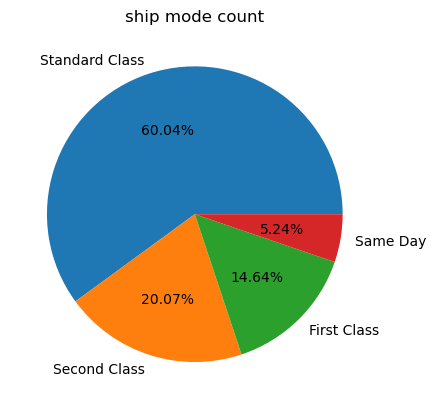

In [29]:
plt.pie(sdf['count'],labels=sdf['Ship Mode'],radius=1.0,autopct='%.2f%%')
plt.title('ship mode count')
plt.show()

# Segmant Count-Visualize

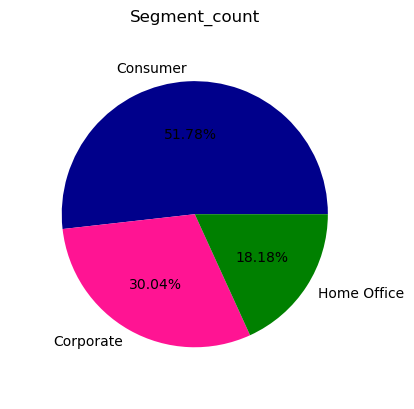

In [30]:
plt.pie(scf['count'],labels=scf['Segment'],autopct='%.2f%%',radius=0.9,colors=['#00008B','#FF1493','#008000'])
plt.title('Segment_count')
plt.show()

## Region With Highest Sales-Visualize

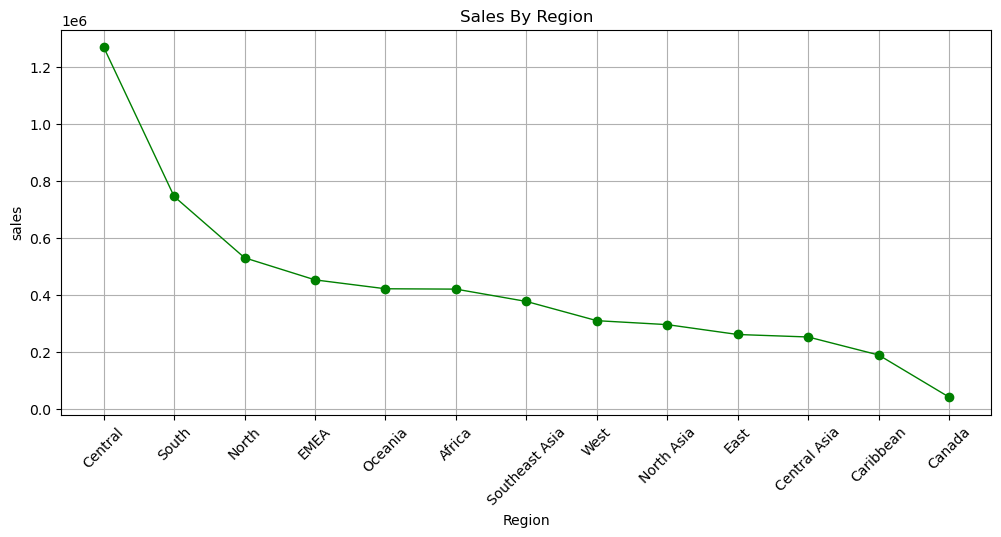

In [31]:
plt.figure(figsize=(12,5))
plt.plot(rdf['Region'],rdf['sales_by_region'],marker='o',color='#008000',linewidth=1)
plt.xlabel('Region')
plt.ylabel('sales')
plt.xticks(rotation=45)
plt.title('Sales By Region')
plt.grid()
plt.show()

## Top 5 Customers With Highest Sales-Visualize

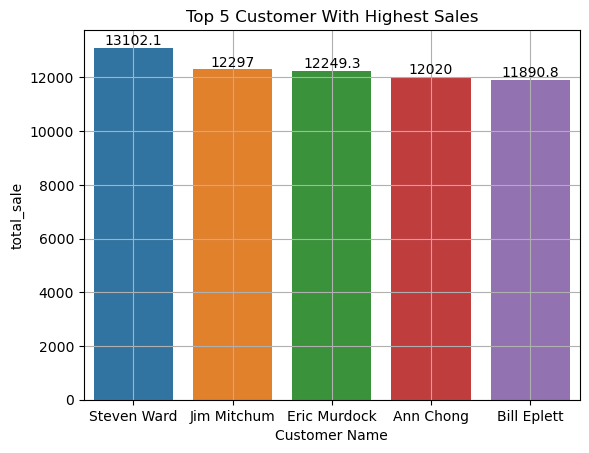

In [32]:
ax = sns.barplot(data=cdf,x='Customer Name',y='total_sale')
plt.grid()
ax.bar_label(ax.containers[0])
plt.title('Top 5 Customer With Highest Sales')
plt.show()

## Yearwise Highest Sales-Visualize

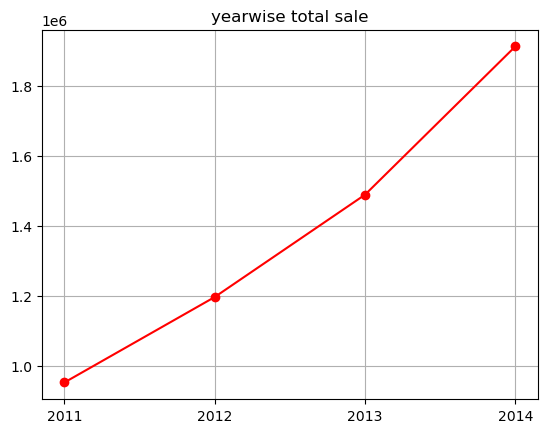

In [33]:
plt.plot(ydf['year'],ydf['sales_by_year'],marker='o',color='red')
plt.title('yearwise total sale')
plt.xticks(np.arange(2011,2015,1))
plt.grid()
plt.show()

# Top 5 Country With Highest Sales-Visualize

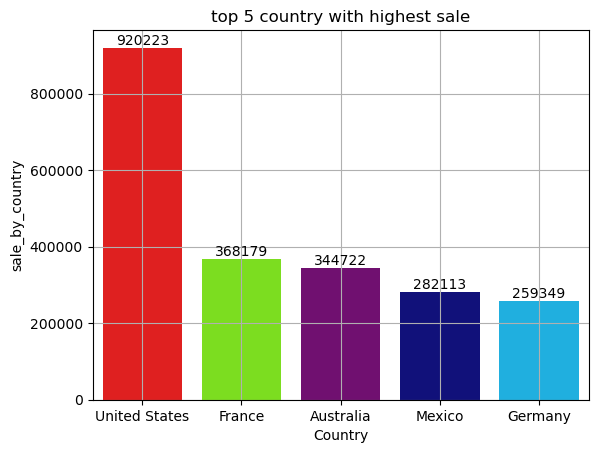

In [34]:
ax = sns.barplot(data=adf,x='Country',y='sale_by_country',palette=['#FF0000','#7CFC00','#800080','#00008B','#00BFFF'])
ax.bar_label(ax.containers[0])
plt.grid()
plt.title('top 5 country with highest sale')
plt.show()

## Sales By Sub-category-Visualize

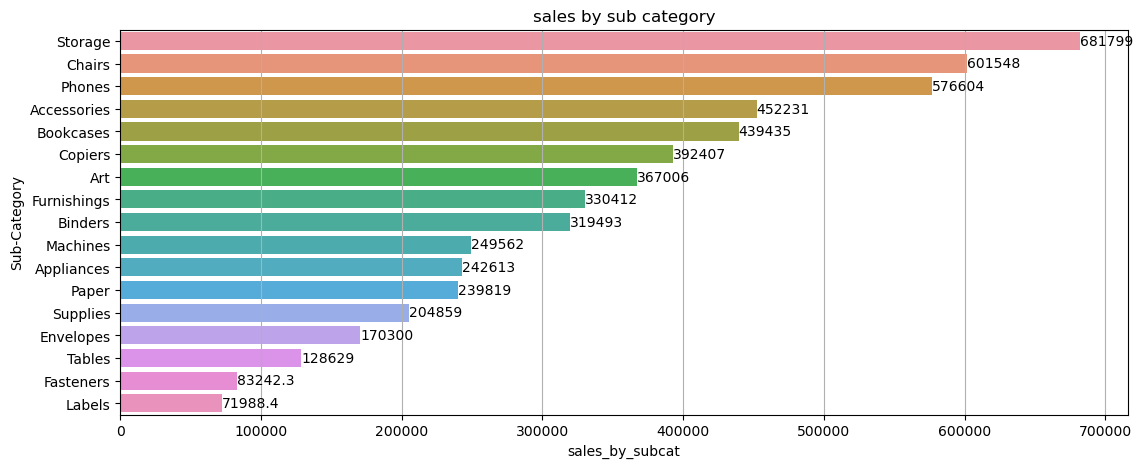

In [35]:
plt.figure(figsize=(13,5))
plt.grid()
ax=sns.barplot(data=ddf,x='sales_by_subcat',y='Sub-Category')
ax.bar_label(ax.containers[0])
plt.title('sales by sub category')
plt.show()

## Sales By Category-Visualize

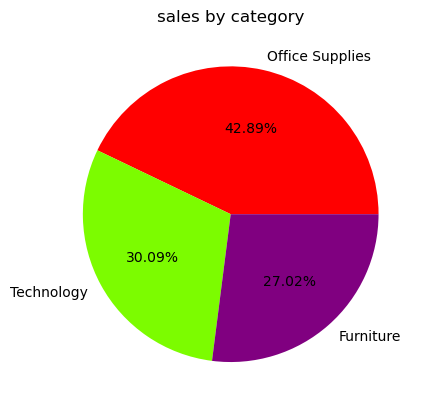

In [36]:
plt.pie(bdf['sales_by_category'],labels=bdf['Category'],autopct='%.2f%%',colors=['#FF0000','#7CFC00','#800080'])
plt.title('sales by category')
plt.show()

## Profit By Sub-Category-Visualize

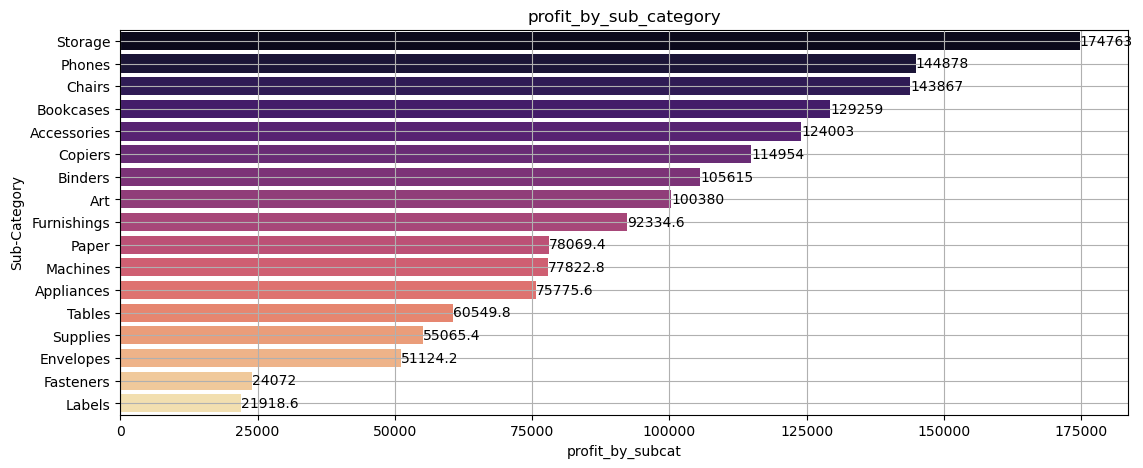

In [37]:
plt.figure(figsize=(13,5))
ax=sns.barplot(data=edf,y='Sub-Category',x='profit_by_subcat',palette='magma')
ax.bar_label(ax.containers[0])
plt.grid()
plt.title('profit_by_sub_category')
plt.show()

## Profit By Category-Visualize

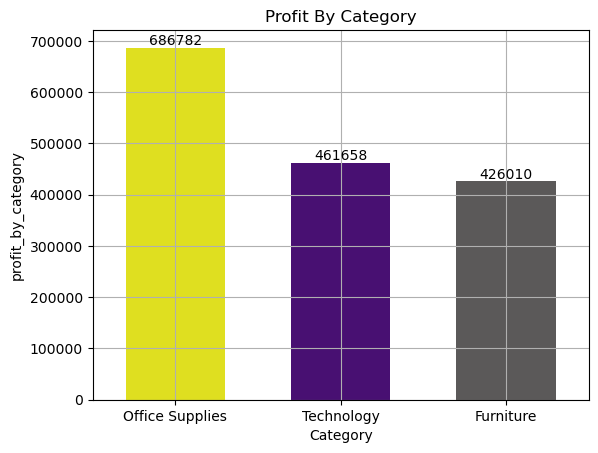

In [38]:
ax=sns.barplot(data=pdf,x='Category',y='profit_by_category',palette=['#FFFF00','#4B0082','#5C5858'],width=0.6)
ax.bar_label(ax.containers[0])
plt.grid()
plt.title('Profit By Category')
plt.show()

## Profit By Year-Visualize

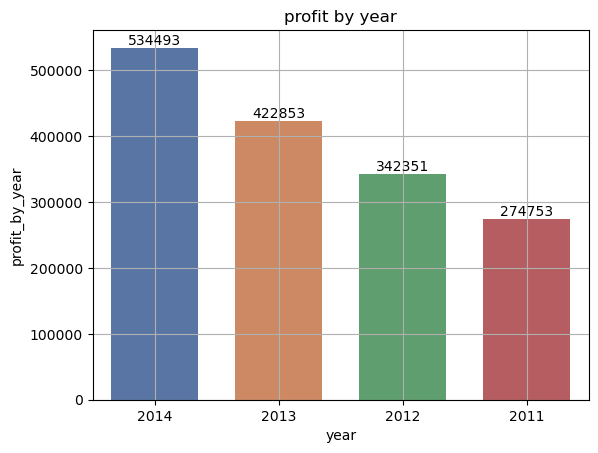

In [39]:
ax=sns.barplot(data=ypf,x='year',y='profit_by_year',palette='deep',order=df['year'].value_counts().index,width=0.7)
ax.bar_label(ax.containers[0])
plt.grid()
plt.title('profit by year')
plt.show()

## Relation Between Sales And Profit

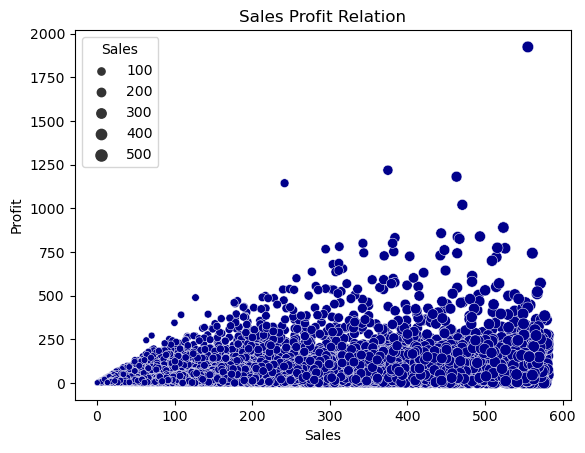

In [40]:
# plt.figure(figsize=(15,5))
sns.scatterplot(data=df,y='Profit',x='Sales',marker='o',color='#00008B',size='Sales')
plt.title('Sales Profit Relation')
plt.show()

# Heatmap Plot 

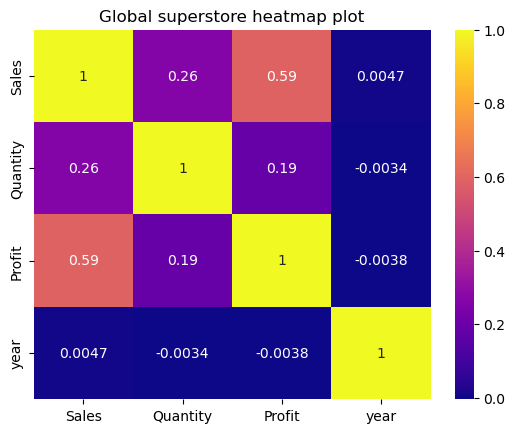

In [41]:
sns.heatmap(df.corr(),annot=True,cmap="plasma")
plt.title('Global superstore heatmap plot')
plt.show()

# The End